Introduction to Data Science<br/>
[Oregon Curriculum Network](http://www.4dsolutions.net/ocn)

# Collecting the Tools

## Anaconda

Like many involved in data science, I encourage getting the Anaconda distribution and relying on the conda package manager, not only to install packages, but to manage environments more generally.

However, no introduction to the Python toolchest can afford to ignore pip, and the conda documentation does a good job describing their differences.  One may use both.

#### A Story from the Real World

This story is examplary of the kind of situation you might encounter.

When running on an older MacBook Pro, I encountered an incompatibility with the latest numpy that was frustrating everything my in workhorse Python 3.7 environment.  

I had just done ```python upgrade --all``` only later remembering this had led to disaster before.  

Fortunately, I was able to track down the source of the bug (the newest numpy [won't run on old Macs](https://github.com/das-developers/condaCDF/issues/1)) and conda managed to figure a way to downgrade to numpy 1.7.3 that apparently involved no other changes, so I got to keep almost all of the upgrade.

But then my Python 3.8 environment insisted on numpy=1.7.3 or above, and installing from the default channel, that would not work.  So I added [conda-forge](https://conda-forge.org/) as another channel and [got numpy=1.7.3 from there](https://campus.datacamp.com/courses/conda-essentials/utilizing-channels?ex=5) and that all worked great.

Note:  you 

## Let's Talk About Typesetting...

A data scientist likely knows some $\LaTeX$ but maybe never wrote a whole thesis in it.  We're in a [Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/What%20is%20the%20Jupyter%20Notebook.html) and need some [math expressions]((https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html) thanks to [MathJax](https://www.mathjax.org/).

Jupyter is our principal tool in many dimensions, as it includes our kernel language (Python), along with many auxilliary features, such as [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

The console query below requests that Jupyter list its possible kernels on Kirbys-MacBook-Pro:

```console
(base) Kirbys-MacBook-Pro:python_camp mac$ jupyter kernelspec list
Available kernels:
  python3    /Users/mac/opt/anaconda3/share/jupyter/kernels/python3
```

So thanks to LaTeX (OK to write it that way too), I can intersperse typeset mathematics with my runnable code.  Often the two will do the "same thing" with the typeset version providing a summary picture of what the source code actually does, when run through its kernel interpreter. 

The first equation below shows off how the notation of linear algebra, with its many matrices, is within our purview, as $LaTeX$ers. 

The second equation is one of Ramanujan's.  I'm tempted to verify it using an arbitrary precision library.  The sequence of digits on the right compared to those on the left, serve an inductive reasoning process.  Euler is right:  mathematics proceeds inductively and then, if we're lucky, we'll get a deductive proof someday, from some genius.

$\LaTeX$

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

\begin{equation*}
\frac{1}{\Bigl(\sqrt{\phi \sqrt{5}}-\phi\Bigr) e^{\frac25 \pi}} =
1+\frac{e^{-2\pi}} {1+\frac{e^{-4\pi}} {1+\frac{e^{-6\pi}}
{1+\frac{e^{-8\pi}} {1+\ldots} } } }
\end{equation*}

The source code for the two above is demarcated differently than those below, which use \$\$.  The first two are the same and have to do with "choosing". For example how many five card hands might be dealt from a standard deck of fifty-two cards?  

The third shows how that choice algorithm features when computing the coefficients of a polynomial of a specific form. These correspond to the numbers in row n of Pascal's Triangle, a binomial distribution that smooths to a Gaussian distribution at the limit.

The last two formulae are likewise special to the statistical sciences (data science, cybernetics, psychometrics):  Bayes' Rule and the Chi-Squared test.

## Python Itself

So far, we have not talked to the Python3 kernel at all.  Lets do so.

Lets verify the last equation above, one of Ramanujan's, using [mpmath](http://mpmath.org/) for arbitrary precision computations, and generally included with Anaconda.  Try ```conda search mpmath``` if you need to install it.

We'll use 60 decimal places of precision, but this could be increased.  You will need to continue the continued fraction if so.

In [26]:
import mpmath
from mpmath import e, pi
print(mpmath.libmp.BACKEND)
mpmath.mp.dps = 100
two   = mpmath.mpf('2')
five  = mpmath.mpf('5')
root5 = mpmath.mpf('5').sqrt()
phi = (1 + root5)/2

term = "(1 + (e ** (-2*{} * pi))/{})"

def cont_frac(n, c=1):
    """
    Recursively build the continued fraction, 
    as a string, to level of depth n
    """
    if n==0:
        return "1"
    else:    
        return "(1 + ((e ** (-2*{} * pi)/{})))".format(c, cont_frac(n-1, c+1))

print(eval(cont_frac(6))) # evaluate the continued fraction
print(1/(((phi * root5).sqrt() - phi) * e ** (two/five * pi))) # left side of the equation
print("Ta daa!")

gmpy
1.001867436219318606077227680424157087122424127427497054500130190210949798909523477849981786389799808
1.001867436219318606077227680424157087122424127427497054500130190210949798909562825712938250353099963
Ta daa!


Cool!  Now, back to $\LaTeX$:

$$
\frac{n!}{k!(n - k)!} = \binom{n}{k} = {}^{n}C_{k} = C_{n}^k
$$

$$
\frac{n!}{k!(n - k)!} = \binom{n}{k}
$$

$$
(x+y)^n = \sum_{k=0}^n {n \choose k} x^{n - k} y^k
$$

$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $$

$$
\tilde{\chi}^2=\frac{1}{d}\sum_{k=1}^{n} \frac{(O_k - E_k)^2}{E_k}
$$


The last formula above is an expression of Bayes' Theorem, which comes in many forms.  

Give $\LaTeX$ a workout as you feel led.

$$
\frac{P(A \mid B) \, P(B)}{P(A)}  = P(A \cap B) = \frac{P(B \mid A) \, P(A)}{P(B)} 
$$

Links:

* https://en.wikiquote.org/wiki/Inductive_reasoning
* https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols

### Data Formats

* JSON
* XML
  * [Brief History](https://sonra.io/2016/10/18/brief-history-xml-hype-useful-data-format/)
  * [pandas to XML?](https://stackoverflow.com/questions/18574108/how-do-convert-a-pandas-dataframe-to-xml)
* CSV

## pandas: Our Spreadsheet Workalike

As I discussed in class, spreadsheets work well as scratch pads, but are somewhat volatile and tough to nail down programmatically.  

How does one include a spreadsheet as one more object in a general purpose programming language.  We're not talking about macros here, and you're afraid of vendor lock in (lets say).

pandas gives us a way to import data at the top of a worksheet, a Notebook, and then document all the step by step transformations that bring us to our conclusions.  Stakeholders have an opportunity to run the same Notebook and verify our conclusions, and/or probe whatever weaknesses.

Yes, it's more work to manipulate a DataFrame programmatically, than to mouse around in a spreadsheet, but once it's all working, you have a documented pipeline or workflow.

In [2]:
import pandas as pd
pd.__version__

'1.0.3'

In [3]:
zoo = pd.DataFrame({"Animals":["Zebra","Lion","Tiger","Bear"], 
                   "Ages":[1,2,3,4]})
zoo.set_index(zoo.Animals, inplace=True)
zoo.drop(labels=["Animals"],axis=1,inplace=True)
zoo

,Ages
Animals,
Zebra,1
Lion,2
Tiger,3
Bear,4


In [4]:
storage = zoo.to_json()
storage

'{"Ages":{"Zebra":1,"Lion":2,"Tiger":3,"Bear":4}}'

In [5]:
new_zoo = pd.read_json(storage)
new_zoo

,Ages
Bear,4
Lion,2
Tiger,3
Zebra,1


In [6]:
outbound = zoo.to_csv()
print(outbound) # remove print to see single string

Animals,Ages
Zebra,1
Lion,2
Tiger,3
Bear,4



In [7]:
zoo.loc["Lion":"Tiger"]

,Ages
Animals,
Lion,2
Tiger,3


In [8]:
zoo.loc["Zebra"]=5
zoo

,Ages
Animals,
Zebra,5
Lion,2
Tiger,3
Bear,4


## Thinking About Games of Chance

We can start getting more statistically oriented within our "calculator of tomorrow", by working with some of those formulae [dealing with combinatorics](https://wikieducator.org/Casino_Math).

We're not "wasting paper" when we repeat content in various orders.  We're permuting, as an aid to comprehension.

Lets put the algorithm we're implementing side by side with its typeset encoding.

$$
\frac{n!}{k!(n - k)!} = \binom{n}{k} = {}^{n}C_{k} = C_{n}^k
$$

In [9]:
from math import factorial

def binom(n,k):
    return (factorial(n)//(factorial(n-k) * factorial(k)))  

In [10]:
how_many = binom(52,5) # Poker
print(f"{how_many:,}") # fancy formatting

2,598,960


In [11]:
[binom(10,k) for k in range(0,11)]

[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]

You may encounter PATH issues however.  Your operating system has a PATH in mind, but then so does Python, in the form of a mutable list of strings. We're free to add to it.

Note that if Python source code modules are present, we're free to import and use them interactively within our Notebook, as we would in any REPL.  You don't have to cram all the source code into a specific Notebook in order to use it.

In [12]:
import sys
print(sys.path)
sys.path.append("./python") # subfolder in Curriculum_Development

['/Users/mac/Documents/Curriculum_Development', '/Users/mac/opt/anaconda3/lib/python37.zip', '/Users/mac/opt/anaconda3/lib/python3.7', '/Users/mac/opt/anaconda3/lib/python3.7/lib-dynload', '', '/Users/mac/opt/anaconda3/lib/python3.7/site-packages', '/Users/mac/opt/anaconda3/lib/python3.7/site-packages/aeosa', '/Users/mac/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/mac/.ipython']


In [13]:
from statsfun import pascal  # in the relative path ./python
pascal(10)  # row n of Pascal's Triangle

[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]

Remember [the Galton Board](https://youtu.be/Kq7e6cj2nDw) at this juncture!


![galton](http://4dsolutions.net/ocn/graphics/randtrianim.gif)

Lets build a deck of cards showing off more of Python's standard library.  The ```product``` function we're using returns an iterator giving the Cartesian product of all rows of a thing with all columns.

Python's itertools library will generate actual permutations and combinations from iterables, if that's what you're looking for, but sometimes we just care how many there would be.

A combination is like a hand of poker.  The order in which the cards are dealt is unimportant.  A permutation of that hand would put the cards in every possible order and count those separately.

Given a 52-card deck, how many unique five card hands might be dealt?  Check below for the answer.


In [14]:
from itertools import product
from random import sample, shuffle

def deck_of_cards():
    face_cards = ['Ace', 'King', 'Queen', 'Jack']
    numb_cards = [str(i) for i in range(2, 11)]
    suits      = ['Hearts', 'Diamonds', 'Spades', 'Clubs']
    # match every card with every suit
    return list(product(face_cards + numb_cards, suits))

In [15]:
deck = deck_of_cards()

In [16]:
shuffle(deck)

The cell below is set off from the rest, because our deck is already defined, created, and shuffled.

In [17]:
sample(deck, 5)

[('4', 'Hearts'),
 ('2', 'Hearts'),
 ('King', 'Hearts'),
 ('3', 'Hearts'),
 ('5', 'Hearts')]

Python's numpy.random module lets us sample a population both with and without replacement.  If you put the card back each time, before you again pick a card, writing down your results, you might well get some repeats.  These could not be poker hands, as card dealing does not involve replacement.

In [18]:
import numpy as np

# turn all the cards into a long list of strings e.g. "Ace of Spades"
card_images = [f"{card} of {suit}" for card, suit in deck]

# now pick 10 cards with replacement i.e. they stay in the deck
sample = np.random.choice(card_images, 10, replace=True)

# the result is a numpy array of datatype Unicode
sample

array(['10 of Diamonds', 'Ace of Hearts', '7 of Hearts', 'Jack of Hearts',
       '3 of Clubs', '6 of Hearts', '6 of Hearts', 'Jack of Spades',
       '7 of Spades', '3 of Hearts'], dtype='<U17')

# Of Bayesians and Frequentists

Have you ever come late to a fight, and by the time you arrive they're all talking about it as some past civil war.  We're all friends now.  That's how it sounds to the ears of this anthropologist, as I poke around in Data Science World.

The Frequentists enjoy the controlled experience of the laboratory and the scientific experiments involving taking many samples, and seeing if any of the rise above the others as noteworthy in some way not explained away by mere chance.

The language of p-values < 0.05 comes from Frequentism.

The Bayesians have been enjoying a boost recently because of several factors:

* an increasing amount of data thanks to the internet especially
* an intuitive approach adjusting beliefs outside the laboratory
* an increasing amount of computer power, to work with all that data

The Bayesian process involves measuring the likelihood of specific data, given a range of  explanatory models or hypotheses, and updating one's assessment of those models accordingly, in light of the incoming data.

*Bayesian Belief Update* reminds us to think in terms of curves.  Our prior belief curve, measured against the likelihood of what we're seeing, gives me an updated posterior.  

The denominator normalizes by averaging over all the outcomes and may take [a disjoint form](https://www.coursera.org/lecture/probability-intro/disjoint-events-general-addition-rule-qaYwc), as the sum of multiple sources.  In medical testing, any false positives and negatives will tend to dilute the likelihood of whatever hypothesis is proposed.

## YouTubes

You may embed Youtubes in your Jupyter Notebooks.  These may not be rendered and made playable on some versions of the rendering engine, such as the one at Github.  By cutting and pasting a Github notebook (a public one) into nbviewer, you will get the more complete rendering, with Youtubes displayed.

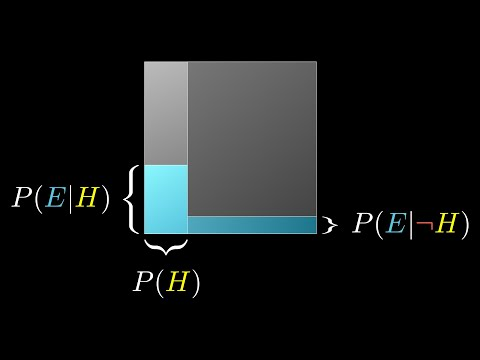

In [19]:
from IPython.display import YouTubeVideo
YouTubeVideo('HZGCoVF3YvM')

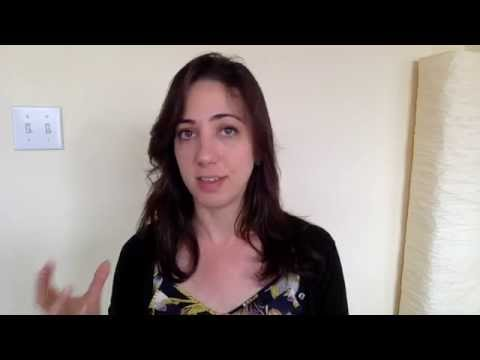

In [20]:
YouTubeVideo('BrK7X_XlGB8')

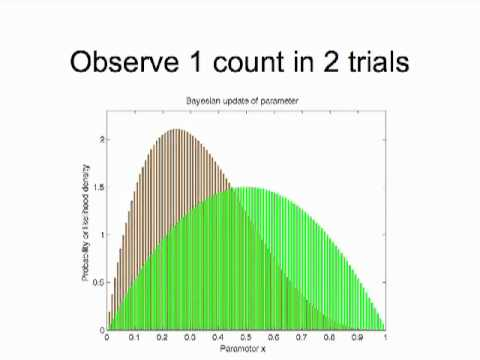

In [21]:
YouTubeVideo('H71Vl78qCXA')

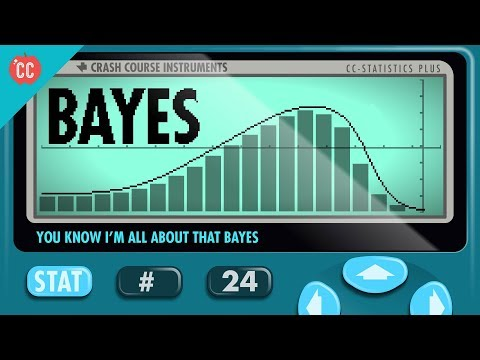

In [22]:
YouTubeVideo('9TDjifpGj-k')

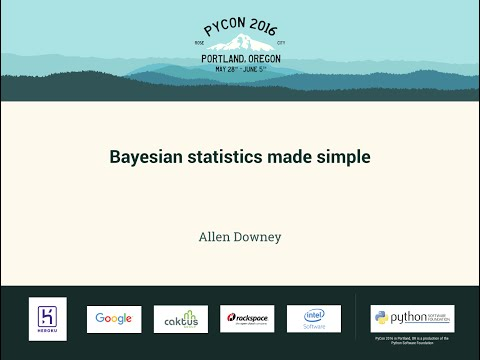

In [23]:
YouTubeVideo('TpgiFIGXcT4')

## The Turing Test

A good example of how we might use inferential reasoning is in order to ascertain whether a conversation is what we might call intelligent.  

Humans and pets get into a feedback loop, of training each other, thereby finding a dynamic equilibrium.  Humans and their computers get into feedback loops also.  An intelligent relationship may form as a result of synergy between participating

Many professionals dream of an ideal conversationalist that provides new insights and understanding, that might also happen to be artificially intelligent, not another human being.

Siri, Alexa and other NLP services suggest a trajectory in the direction of more conversationally adept bots.

![Sophia](https://media.giphy.com/media/SKT4HdqZSSPbaobtPs/giphy.gif)

What kinds of tests would we use to update prior beliefs regarding the probability that we're speaking with a machine intelligence and not another human?  That's what the Turing Test was all about: if we couldn't be sure, and yet the conversant was a machine, we could say "the machine has passed the test".

The question, and conclusion (either way, pass or fail), only makes sense as long as we're able to keep the meaning of "machine" intact, as in "something humanly contrived".  

If we admit or decide that nature is in the machine-making business (because nature is high tech), then we'll need to work harder to explain the difference we're looking for, perhaps by specifying more clearly the differences that make a difference.

## Unicode:  More Tools

In [24]:
𨭎 = 10

In [25]:
𨭎

10